In [83]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
from datetime import datetime

In [93]:
df = pd.read_csv('../data/aqar.csv')

In [94]:
df['onMarket'].mean()

46.1810115350488

In [95]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'DayOfRent', 'onMarket', 'timeBeforeRent'],
      dtype='object')

In [96]:
df['timeBeforeRent'].value_counts()

0       4293
10        89
6         88
12        82
14        82
        ... 
120        1
105        1
1199       1
80         1
202        1
Name: timeBeforeRent, Length: 151, dtype: int64

In [97]:
df["onMarket"] = 0

In [98]:
for index , row in df.iterrows():
    if(row['timeBeforeRent'] == 0 ):
        td = int(((datetime.now() ) - (pd.to_datetime( row['create_time'][2:12] , format='%Y-%m-%d')))/np.timedelta64(1, 'D'))
        # # td = int(td )
        df['onMarket'][index] = td
    else:
        df['onMarket'][index] = df['timeBeforeRent'][index]

/tmp/ipykernel_18206/3402429901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onMarket'][index] = td
/tmp/ipykernel_18206/3402429901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onMarket'][index] = df['timeBeforeRent'][index]


<AxesSubplot:ylabel='Frequency'>

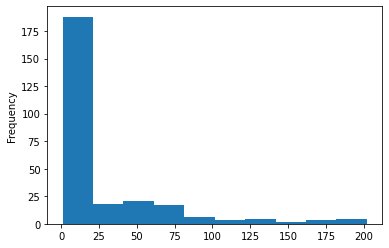

In [99]:
df['onMarket'].value_counts().plot(kind = 'hist')

In [100]:
df['onMarket'].mean()

47.47160603371783

In [101]:
df.to_csv('../data/aqar.csv')